# Birthing a Simple Perceptron

Date May 21, 2018

The following experiment implements a perceptron in a Python class with a number of class variables and two class methods: train and predict.

A perceptron is the basic atomic working unit of neural networks, popular structures that today helps facilitate computing implementation algorithms for problems in deep learning. 

More on perceptron --> https://en.wikipedia.org/wiki/Perceptron

BlueberryTron named after our dog 'Blueberry'


In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
def activat1(x):
    return np.tanh(x)

def activat2(x):
    if x >= 0:
        return 1
    else:
        return -1

In [121]:
#perceptron class using activate function 2
class perceptron2(object):
    def __init__(self,dim):
        self.dim = dim #input space dimension
        self.lr = 0.1 #learning rate
        self.w = np.array([0.001]*(dim+1)) #+1 for bias
        self.cycles = 0 #counter for number of loop cycles
        self.converger = 100 #check for convergence
        self.maxiter = 10000 #max num of iterations before the loop stops
        self.toler = 0.001 #tolerance
        self.errors = 0 #number of wrong prediction in the testing set 
    
    #training algorithm
    def train(self, X, y):
        
        little_w = 0 #counter for little changes of bias
        
        while(little_w < self.converger and self.cycles < self.maxiter):
            
            i = np.random.randint(0, len(X))
            x_vec  = np.concatenate( ([1],X[i])) #random example with bias
            d = y[i] #desired output for the selected example

            old_w = self.w
            self.w = self.w + self.lr*(d - activat2(np.dot(self.w, x_vec)))*x_vec #Learning Rule using activat2

            if np.linalg.norm(self.w - old_w) < self.toler:
                little_w = little_w + 1
            else:
                little_w = 0 #if w changed enough we reset the counter

            self.cycles = self.cycles + 1
            
    def predict(self, X_pred, y_des):
        y_pred = ['error']*len(X_pred) #we initialize the vector of predictions
        for i in range( len(X_pred) ):
            x_vec = np.concatenate( ([1],X_pred[i])) #example selected with bias
            y_pred[i] = activ(np.dot(self.w, x_vec)) #computing the prediction
            if (y_pred[i] != y_des[i]): #if the prediction is uncorrect
                self.errors = self.errors + 1 #add 1 to the errors counter
            
        return y_pred

In [122]:
# Train Set
Npoints = 100
xcomp = np.linspace(0,np.pi, Npoints)

red_gauss = np.random.normal(size=Npoints, loc=0, scale=2)
redPts = np.array([np.array([xcomp[i],3*xcomp[i] + red_gauss[i]]) for i in range(100)])
redDes = np.repeat(-1,100)

blue_gauss = np.random.normal(size=Npoints, loc=8, scale=2)
bluePts = np.array([ np.array([xcomp[i],3*xcomp[i] + blue_gauss[i]]) for i in range(100)])
blueDes = np.repeat(1,100)

X_train = np.concatenate((redPts,bluePts))
y_train = np.concatenate((redDes,blueDes))

In [123]:
# Test Set
Npoints = 50
xcomp = np.linspace(0, np.pi, Npoints)

red_gauss = np.random.normal(size=Npoints, loc=0, scale=2)
redPts = np.array([np.array([xcomp[i],3*xcomp[i] + red_gauss[i]]) for i in range(Npoints)])
redDes = np.repeat(-1,Npoints)

blue_gauss = np.random.normal(size=Npoints, loc=8, scale=2)
bluePts = np.array([ np.array([xcomp[i],3*xcomp[i] + blue_gauss[i]]) for i in range(Npoints)])
blueDes = np.repeat(1,Npoints)

X_test = np.concatenate((redPts,bluePts))
y_test = np.concatenate((redDes,blueDes))

In [124]:
# Model
dimension = X_train.shape[1]
Blueberrytron = perceptron2(dimension)
Blueberrytron.train(X_train, y_train)
Blueberrytron.predict(X_test, y_test)

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1]

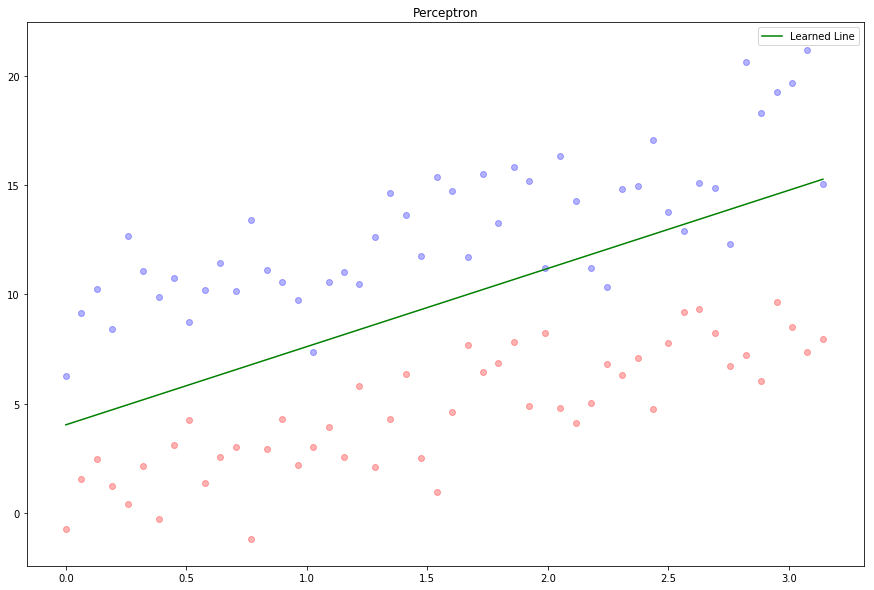

In [125]:
plt.figure(figsize=(15,10))
for i in range(Npoints):
    plt.scatter(redPts[i,0],redPts[i,1],alpha = 0.3,c='r')
    plt.scatter(bluePts[i,0],bluePts[i,1],alpha = 0.3,c='b')
weights = Blueberrytron.w
plt.plot(xcomp, -(weights[1]*xcomp + weights[0])/weights[2] , 'g-',label='Learned Line') 
plt.savefig('Blueberrytron.png')
plt.title('Perceptron')
plt.legend()
plt.show()

# Try TanH

In [130]:
#perceptron class using activate function 1 tanh
class perceptron1(object):
    def __init__(self,dim):
        self.dim = dim #input space dimension
        self.lr = 0.1 #learning rate
        self.w = np.array([0.001]*(dim+1)) #+1 for bias
        self.cycles = 0 #counter for number of loop cycles
        self.converger = 100 #check for convergence
        self.maxiter = 10000 #max num of iterations before the loop stops
        self.toler = 0.001 #tolerance
        self.errors = 0 #number of wrong prediction in the testing set 
    
    #training algorithm
    def train(self, X, y):
        
        little_w = 0 #counter for little changes of bias
        
        while(little_w < self.converger and self.cycles < self.maxiter):
            
            i = np.random.randint(0, len(X))
            x_vec  = np.concatenate( ([1],X[i])) #random example with bias
            d = y[i] #desired output for the selected example

            old_w = self.w
            self.w = self.w + self.lr*(d - activat1(np.dot(self.w, x_vec)))*x_vec #Learning Rule using activat2

            if np.linalg.norm(self.w - old_w) < self.toler:
                little_w = little_w + 1
            else:
                little_w = 0 #if w changed enough we reset the counter

            self.cycles = self.cycles + 1
            
    def predict(self, X_pred, y_des):
        y_pred = ['error']*len(X_pred) #we initialize the vector of predictions
        for i in range( len(X_pred) ):
            x_vec = np.concatenate( ([1],X_pred[i])) #example selected with bias
            y_pred[i] = activ(np.dot(self.w, x_vec)) #computing the prediction
            if (y_pred[i] != y_des[i]): #if the prediction is uncorrect
                self.errors = self.errors + 1 #add 1 to the errors counter
            
        return y_pred

In [131]:
dimension = X_train.shape[1]
Blueberrytron = perceptron1(dimension)
Blueberrytron.train(X_train, y_train)
Blueberrytron.predict(X_test, y_test)

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1]

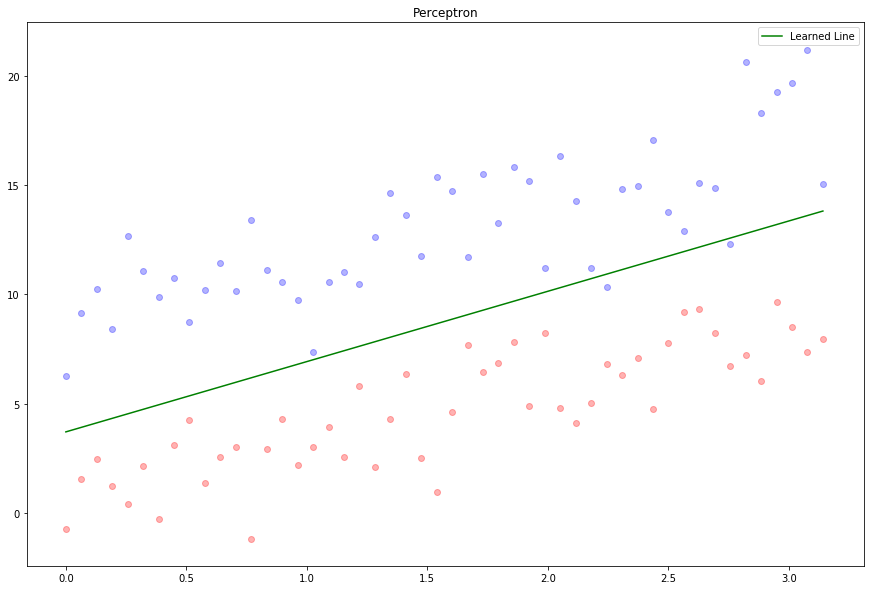

In [132]:
plt.figure(figsize=(15,10))
for i in range(Npoints):
    plt.scatter(redPts[i,0],redPts[i,1],alpha = 0.3,c='r')
    plt.scatter(bluePts[i,0],bluePts[i,1],alpha = 0.3,c='b')
weights = Blueberrytron.w
plt.plot(xcomp, -(weights[1]*xcomp + weights[0])/weights[2] , 'g-',label='Learned Line') 
plt.savefig('Blueberrytron.png')
plt.title('Perceptron')
plt.legend()
plt.show()